1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z = 2.9


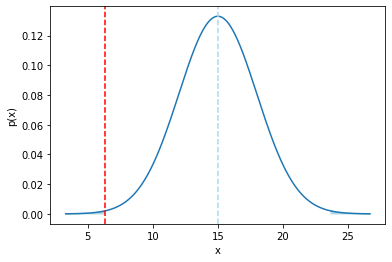

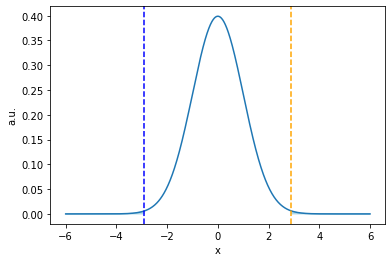

p-value = 0.0037316266007680825


In [1]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

x0 = 6.3
mu = 15.
sigma = 3.

# determine the Z score
Z = abs(x0 - mu) / sigma
print("Z =", Z)

w = mu - x0
x = np.linspace(mu - w - 3, w + mu + 3, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y)
plt.fill_between(x, y, where=np.abs(x - mu) > w, color='lightblue')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.ylabel("p(x)")
plt.xlabel("x")
plt.show()


# plot the test statistics and its pdf
xs = np.linspace(-6, 6, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)
# Since we consider statictically significant a probability that has a Z scose of 3 or larger this one is not.
# We see that p-value is not greater than the significance level so we reject the null hypothesis.

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [5]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

_, pvalue = stats.ttest_ind(pre, post)

print(f"P-value is {pvalue} that is less than alpha/2, therefor we accept the null hypothesis.")

P-value is 0.00134994183132767 that is less than alpha/2, therefor we accept the null hypothesis.


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

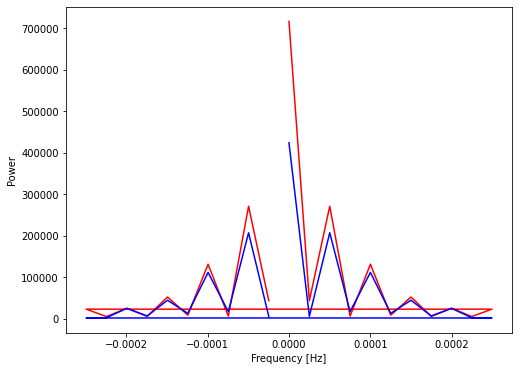

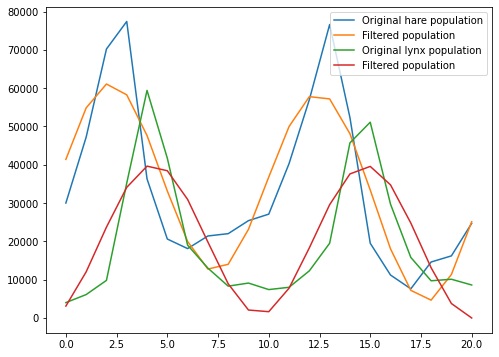

In [34]:
from scipy import fftpack

data = np.loadtxt('./data/populations.txt')
y = []
h = []
l = []
c = []
    
for i in range(0, len(data)):
    y.append(data[i][0])
    h.append(data[i][1])
    l.append(data[i][2])
    c.append(data[i][3])
year = np.array(y)
hare = np.array(h)
lynx = np.array(l)
carrot = np.array(c)

sig_fft1 = fftpack.fft(hare)
power_hare = np.abs(sig_fft1)
sample_freq_hare = fftpack.fftfreq(hare.size, d=year)

sig_fft2 = fftpack.fft(lynx)
power_lynx = np.abs(sig_fft2)
sample_freq_lynx = fftpack.fftfreq(lynx.size, d=year)

plt.figure(figsize=(8, 6))
plt.plot(sample_freq_hare, power_hare, 'r-')
plt.plot(sample_freq_lynx, power_lynx, 'b-')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

# Find the peak frequency: focus only on the positive frequencies
pos_mask_hare = np.where(sample_freq_hare > 0)
freqs_hare = sample_freq_hare[pos_mask_hare]
powes_hare = power_hare[pos_mask_hare]
# find the max of freqs array
peak_freq_hare = freqs_hare[powes_hare.argmax()]
high_freq_fft1 = sig_fft1.copy()
high_freq_fft1[np.abs(sample_freq_hare) > peak_freq_hare] = 0
filtered_sig_hare = fftpack.ifft(high_freq_fft1)
real_filtered_signal_hare = np.real(filtered_sig_hare)

# Find the peak frequency: focus only on the positive frequencies
pos_mask_lynx = np.where(sample_freq_lynx > 0)
freqs_lynx = sample_freq_lynx[pos_mask_lynx]
powes_lynx = power_lynx[pos_mask_lynx]
peak_freq_lynx = freqs_lynx[powes_lynx.argmax()]
high_freq_fft2 = sig_fft2.copy()
high_freq_fft2[np.abs(sample_freq_lynx) > peak_freq_lynx] = 0
filtered_sig_lynx = fftpack.ifft(high_freq_fft2)
real_filtered_signal_lynx = np.real(filtered_sig_lynx)

time = np.arange(0, 21, 1)

plt.figure(figsize=(8, 6))
plt.plot(time, hare, label='Original hare population')
plt.plot(time, real_filtered_signal_hare, label='Filtered population')
plt.plot(time, lynx, label='Original lynx population')
plt.plot(time, real_filtered_signal_lynx, label='Filtered population')
plt.legend(loc='best')

### 4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

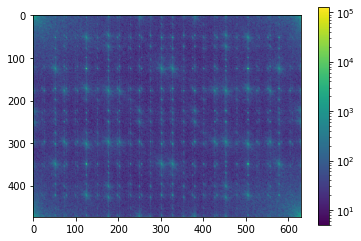

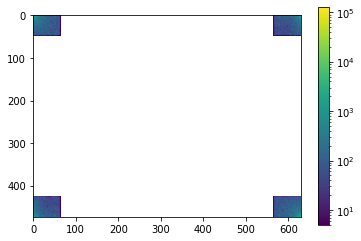

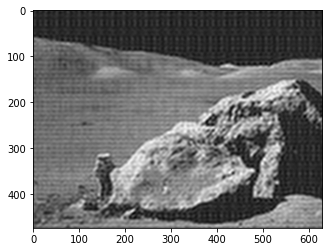

In [4]:
from matplotlib.colors import LogNorm

image = plt.imread("moonlanding.png")

fft = fftpack.fft2(image)
plt.imshow(np.abs(fft), norm=LogNorm(vmin=5))
plt.colorbar()

fraction = 0.1
fft2 = fft.copy()
row, column = fft2.shape
fft2[int(row*fraction):int(row*(1-fraction))] = 0
fft2[:, int(column*fraction):int(column*(1-fraction))] = 0

plt.figure()
plt.imshow(np.abs(fft2), norm=LogNorm(vmin=5))
plt.colorbar()

filtered_image = fftpack.ifft2(fft2).real
plt.figure()
plt.imshow(filtered_image, plt.cm.gray)